In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
FILE_PATH = "D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch03"

In [3]:
slope_1 = (0.05-0.002)/28
slope_2 = (0.250-0.050)/(75-28)
slope_3 = (0.750-0.250)/(150-75)
slope_4 = (0.950-0.750)/(210-150)
slope_5 = (1-0.950)/(255-210)

In [4]:
x_arr = np.arange(0,256).astype(float)
h_R = np.piecewise(x_arr,[x_arr>=0, x_arr>=28, x_arr>=75, x_arr>=150, x_arr>=210], [slope_1, slope_2, slope_3, slope_4, slope_5])

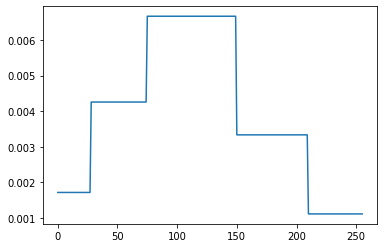

In [5]:
plt.plot(np.arange(0,256), h_R)

In [6]:
y1 = np.array([slope_1*x + 0.002 for x in range(0,28)])
y2 = np.array([slope_2*(x-28) + 0.05 for x in range(28,75)])
y3 = np.array([slope_3*(x-75) + 0.25 for x in range(75,150)])
y4 = np.array([slope_4*(x-150) + 0.75 for x in range(150,210)])
y5 = np.array([slope_5*(x-210) + 0.95 for x in range(210,256)])
P_R = np.concatenate((y1,y2,y3,y4,y5))

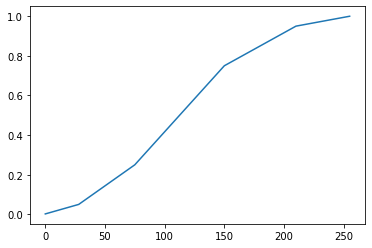

In [7]:
plt.plot(P_R)

In [8]:
IMG_PATH = os.path.join(FILE_PATH, "airfield-05small.tif")
img = plt.imread(IMG_PATH)

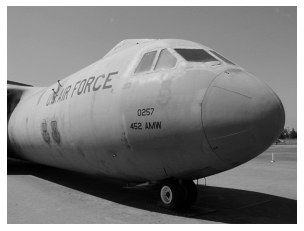

In [9]:
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [10]:
(height, width) = img.shape

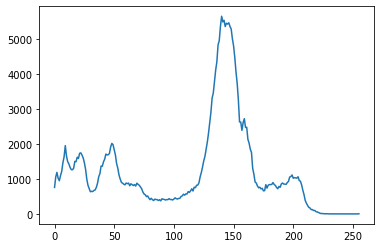

In [11]:
h_A = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(h_A)
plt.show()

In [12]:
histogram_image_clean = np.squeeze(h_A)/(height*width)
P_A = np.cumsum(histogram_image_clean)

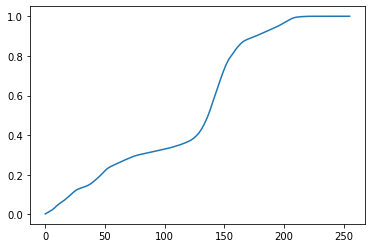

In [13]:
plt.plot(P_A)

In [14]:
def match_histogram(PA, PR):
    f_hs = np.zeros_like(PA)
    k = f_hs.shape[0]
    for a in range(0,256):
        j = k-1
        f_hs[a] = j
        j -= 1
        while(j>=0 and PA[a]<= PR[j]):
            f_hs[a] = j
            j -= 1
    return f_hs


In [15]:
f_hs = match_histogram(P_A, P_R)

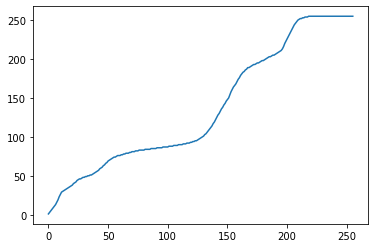

In [16]:
plt.plot(f_hs)

In [17]:
f = lambda x: f_hs[x]
new_img = f(img).astype(np.uint8)

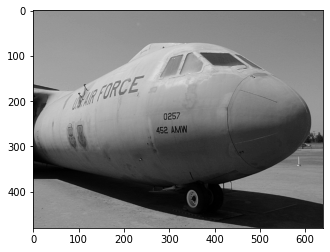

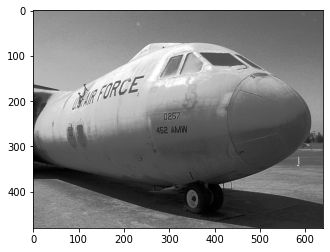

In [18]:
plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(new_img, cmap="gray")
plt.show()
# plt.imshow(new_img.astype(np.uint8), cmap="gray")
# plt.show()


In [19]:
print(type(new_img))
print(type(img))
print(new_img.shape, img.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(480, 640) (480, 640)


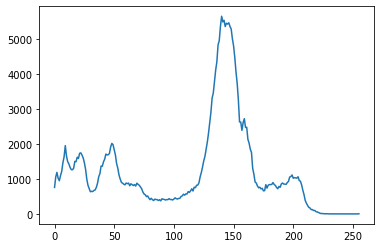

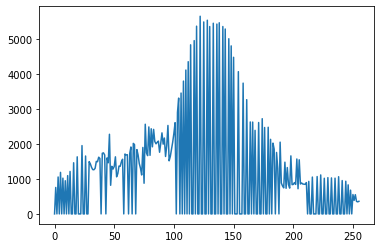

In [20]:
plt.plot(h_A)
plt.show()
h_A_mapped = cv2.calcHist([new_img], [0], None, [256], [0, 256])
plt.plot(h_A_mapped)
plt.show()

In [21]:
histogram_image_clean_mapped = np.squeeze(h_A_mapped)/(height*width)
P_A_mapped = np.cumsum(histogram_image_clean_mapped)

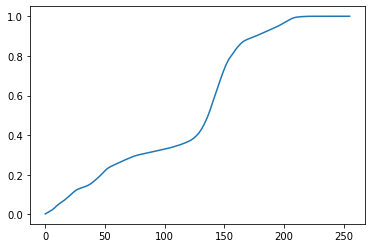

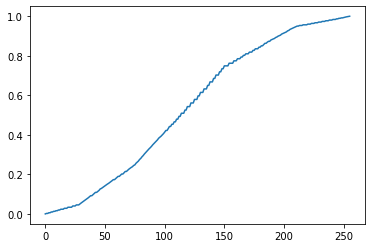

In [22]:
plt.plot(P_A)
plt.show()
plt.plot(P_A_mapped)
plt.show()